In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


In [35]:
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
data = pd.read_csv('/kaggle/input/salary/Salary.csv')
x = data["YearsExperience"]
y = data["Salary"]
data

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


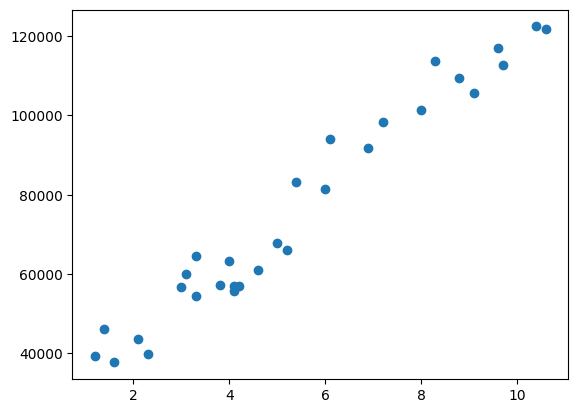

In [37]:
plt.scatter(x,y)
plt.show()

In [38]:
w=0
b=0
L=0.005
turns=10000

In [39]:
def gradient(w1,b1,points,L):
    w_grad=0
    b_grad=0
    n=len(points)

    for i in range(n):
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary
        w_grad+=-(2/n)*x*(y-(w1*x+b1))
        b_grad+=-(2/n)*(y-(w1*x+b1))

    w_new=w1-w_grad*L
    b_new=b1-b_grad*L
    return w_new,b_new

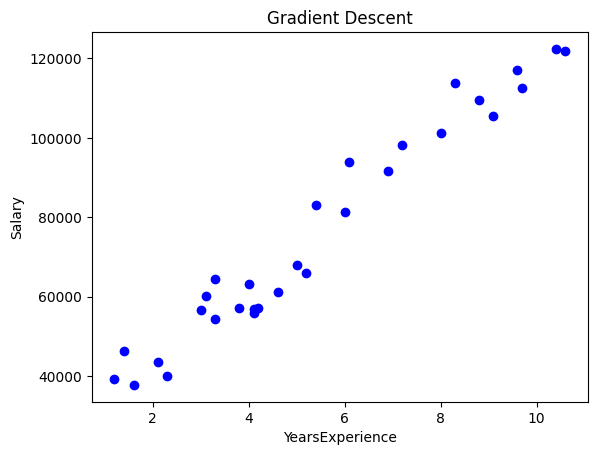

In [40]:
fig, ax = plt.subplots()
ax.scatter(x,y,color="blue")
ax.set_xlabel("YearsExperience")
ax.set_ylabel("Salary")
ax.set_title("Gradient Descent")
line = ax.plot([],[],color="red",linewidth=2)

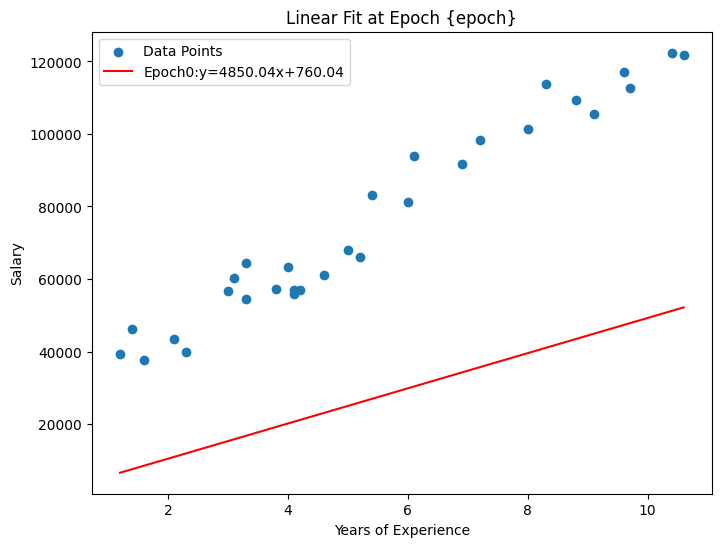

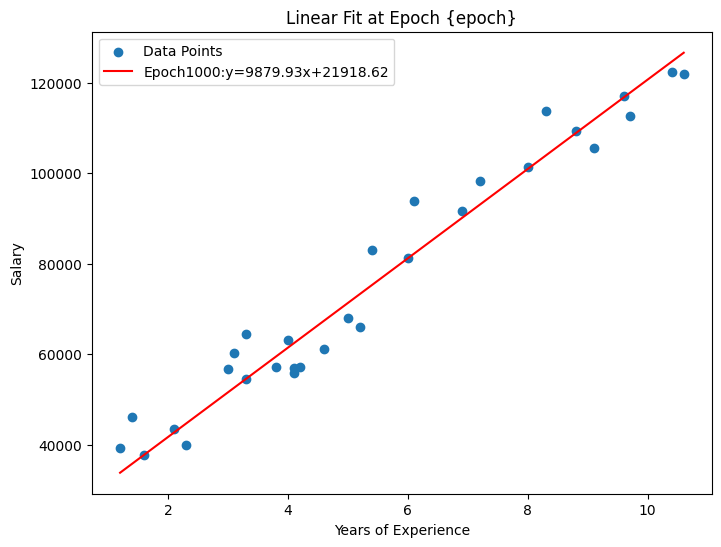

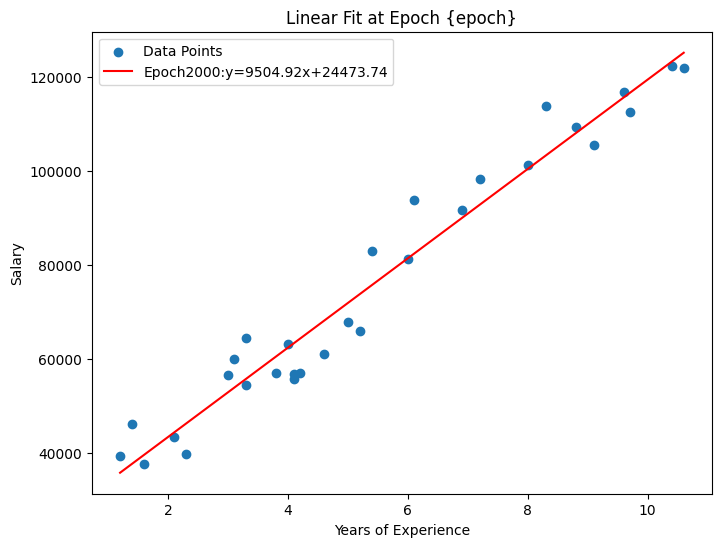

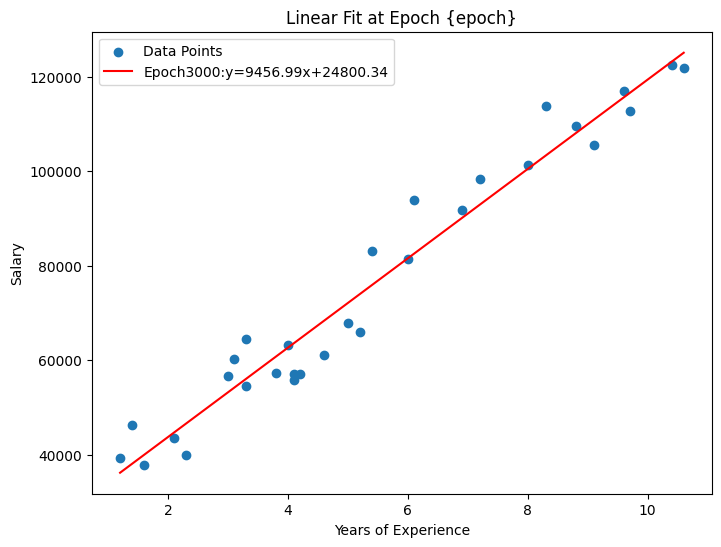

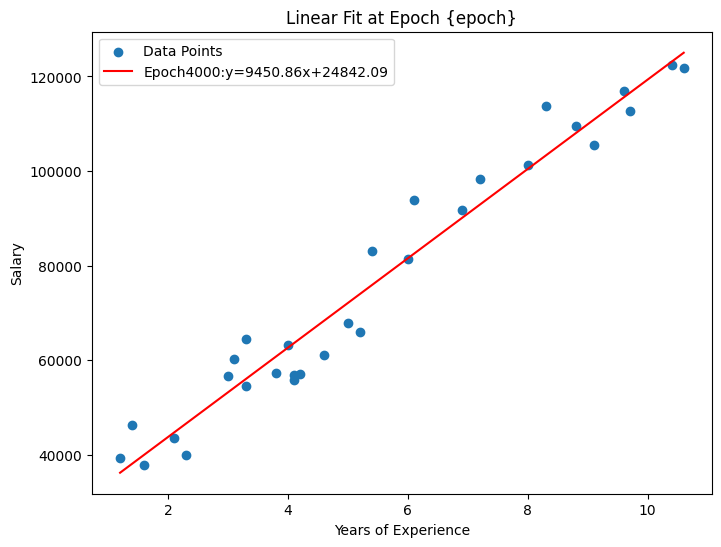

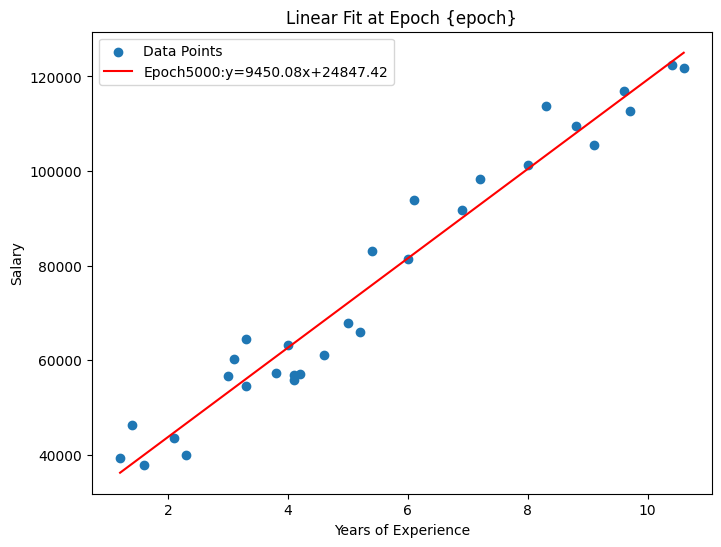

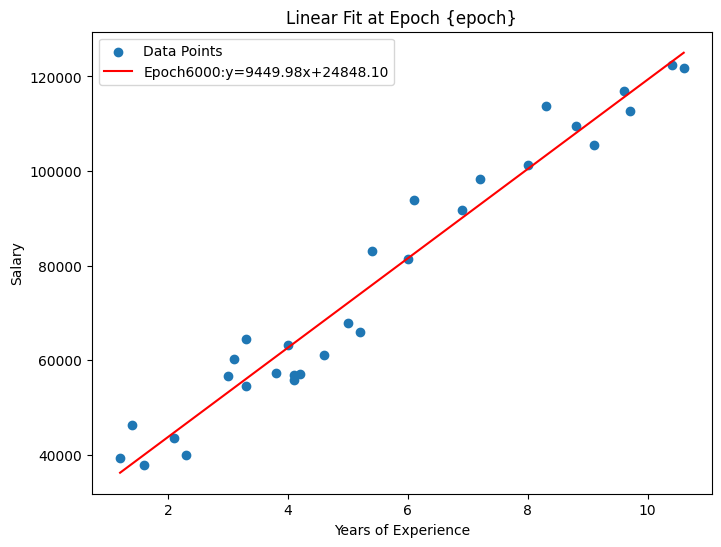

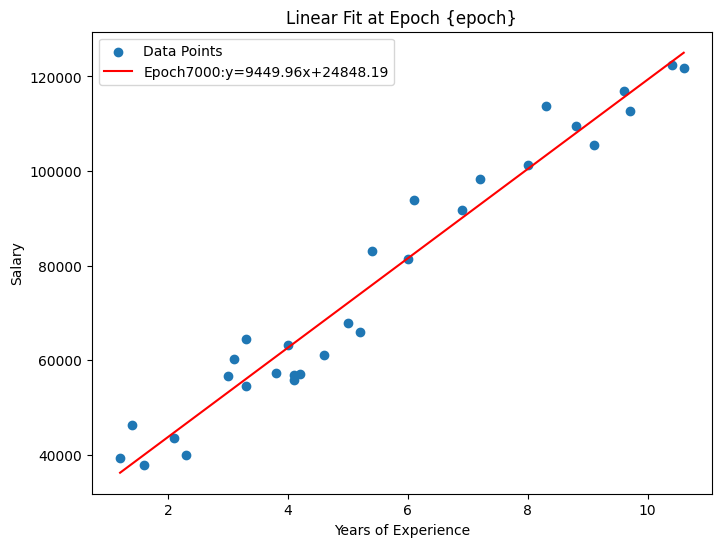

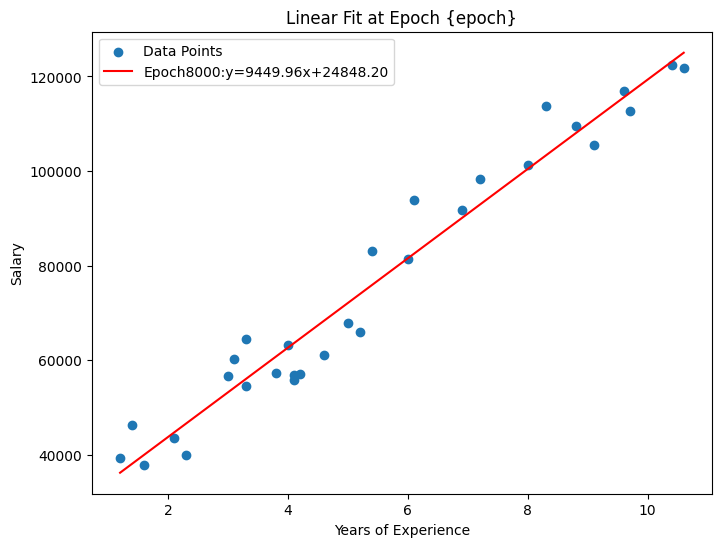

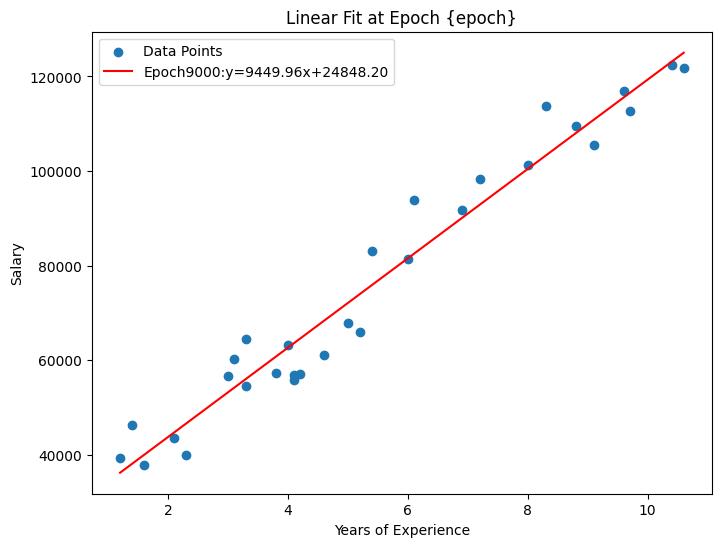

In [41]:
for epoch in range(turns):
    w,b = gradient(w,b,data,L)
    if epoch%1000==0:
        plt.figure(figsize=(8,6))
        plt.scatter(data.YearsExperience,data.Salary,label="Data Points")
        #Plot the updated line
        x_vals=data.YearsExperience
        y_vals=w*x_vals+b
        plt.plot(x_vals,y_vals,color="red",label=f"Epoch{epoch}:y={w:.2f}x+{b:.2f}")
        plt.legend()
        plt.title("Linear Fit at Epoch {epoch}")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.show()
        
